In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [2]:
#Import du dataset présent dans Keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

#Get subpart of the dataset
images = images[:10000]
targets = targets[:10000]

#### Checking on of the data

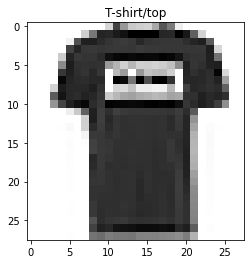

In [3]:
targets_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#Plot one image
plt.imshow(images[1], cmap = 'binary')
plt.title(targets_names[targets[1]])
plt.show()

#### Pre-processing

In [4]:
#Applatissement de l'image (Flatten): images en 28*28 = 784
#model.add(tf.keras.layers.Flatten(input_shape = [28,28]))
images = images.reshape(-1, 784)
images = images.astype(float)

#Normalisation (images = (images - np.mean(images)) / np.std(images))
images = StandardScaler().fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


In [5]:
#Spliting the dataset into train_set and test_set

from sklearn.model_selection import train_test_split

images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size = 0.2, random_state =  42)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


#### Creating the model

In [11]:
#Création d'un model séquentiel
model = tf.keras.models.Sequential()

#Ajouts des layers
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_output = model(images[0:1])
print(model_output, targets[0:1])

tf.Tensor(
[[0.25079268 0.06381431 0.16733965 0.03051468 0.15194176 0.0371086
  0.1415693  0.05582154 0.07654673 0.02455075]], shape=(1, 10), dtype=float32) [9]


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (1, 256)                  200960    
_________________________________________________________________
dense_4 (Dense)              (1, 128)                  32896     
_________________________________________________________________
dense_5 (Dense)              (1, 64)                   8256      
_________________________________________________________________
dense_6 (Dense)              (1, 10)                   650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

#### Train the model on the train_set

In [14]:
history = model.fit (images_train, targets_train, epochs = 10,
                     batch_size=1, validation_split = 0.2)

Epoch 1/10
6400/6400 [==============================] - 18s 3ms/step - loss: 0.7032 - accuracy: 0.7511 - val_loss: 0.5277 - val_accuracy: 0.8037
Epoch 2/10
6400/6400 [==============================] - 18s 3ms/step - loss: 0.5016 - accuracy: 0.8219 - val_loss: 0.5749 - val_accuracy: 0.7912
Epoch 3/10
6400/6400 [==============================] - 14s 2ms/step - loss: 0.4209 - accuracy: 0.8477 - val_loss: 0.5063 - val_accuracy: 0.8194
Epoch 4/10
6400/6400 [==============================] - 14s 2ms/step - loss: 0.3999 - accuracy: 0.8572 - val_loss: 0.5469 - val_accuracy: 0.8219
Epoch 5/10
6400/6400 [==============================] - 13s 2ms/step - loss: 0.3670 - accuracy: 0.8680 - val_loss: 0.4983 - val_accuracy: 0.8325
Epoch 6/10
6400/6400 [==============================] - 13s 2ms/step - loss: 0.3178 - accuracy: 0.8802 - val_loss: 0.5559 - val_accuracy: 0.8363
Epoch 7/10
6400/6400 [==============================] - 13s 2ms/step - loss: 0.2707 - accuracy: 0.8988 - val_loss: 0.5465 - val_ac

In [16]:
model.evaluate(images_test, targets_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8500


[0.5023539662361145, 0.8500000238418579]

#### Making a prediction

In [17]:
targets_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

model_output = model.predict(images[0:1])

for i in model_output:
    for j in i:
        if j<0.5:
            pass
        else:
            model_output = list(i).index(j)

print(f'Model predict that the image is a {targets_names[model_output]}, when in reality, it is a {targets_names[targets[0:1][0]]}')

Model predict that the image is a Ankle Boot, when in reality, it is a Ankle Boot


#### Save a model

In [35]:
#Save the model
#model.save('fashion_nn')

#Lad the model
#loaded_model = tf.keras.models.load_model('fashion_nn')